<a id='home'></a>
<img src="../img/BCTheme.png"><br>
<div style="text-align: right">
    <p style="text-align: right; font-size:16px; font-style: italic">Filipi Rigui</p>
    <a href="https://www.linkedin.com/in/filipirigui/"><img border="0" alt="LinkedIn" src="../img/in.png" width="32" height="32"></a>   
    <a href="https://github.com/fdrigui"><img border="0" alt="LinkedIn" src="../img/gh.png" width="32" height="32"></a>
</div><br>
<p><i>Para uma melhor imersão visual, abrir projeto no <b>Jupyter ou Google Colab</b></i></p>

  [ **Readme Módulo 02**](readme.md)<br>

| [Aula 02](Aula_02.ipynb) |

<h1><b><span style="color:#5C0040">Aula 01:</span></b> Entendendo a série temporal</h1>

__________________


- [Coleta de dados e primeiras análises](#Coleta_de_dados_e_primeiras_analises)<br>
- [Taxa de crescimento e média móvel](#taxa_de_crescimento_e_media_movel)<br>
- [Correlação e função de autocorrelação](#correlacao_e_funcao_de_autocorrelacao)<br>


<a id='Coleta_de_dados_e_primeiras_analises'></a>
<h2><b><span style="color:#5C0040">Parte 1: </span></b> Coleta de dados e primeiras análises</h2>

__________

<h3><b><span style="color:#5C0040">Importação das bibliotecas</span></b></h3>

In [174]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from scipy.stats import linregress
from detecta import detect_peaks #Detecta melhor que o scipy, simplesmente pq quem fez é BR, da UFABC...
from scipy.fftpack import fft
from scipy.signal import welch

<h3><b><span style="color:#5C0040">Configurações do ambiente</span></b></h3>

In [2]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

<h3><b><span style="color:#5C0040">Carregamento dos dados</span></b></h3>

In [3]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

# O Parâmetro 'usecols' eu adicionei por conta própria, para diminuir o tamanho do DF... 
dados = pd.read_csv(url, sep=';', parse_dates=['datahora'], infer_datetime_format='%Y-%m-%d',
                   usecols=['nome_munic','datahora','casos','casos_novos','obitos','obitos_novos'])
# Pode-se utilizar 'parse_dates' + 'infer_datetime_format' para converter para data com o read_csv
# dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')
display(dados.info())
display(dados.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   nome_munic    286178 non-null  object        
 1   datahora      286178 non-null  datetime64[ns]
 2   casos         286178 non-null  int64         
 3   casos_novos   286178 non-null  int64         
 4   obitos        286178 non-null  int64         
 5   obitos_novos  286178 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 13.1+ MB


None

,nome_munic,datahora,casos,casos_novos,obitos,obitos_novos
0,Adamantina,2020-02-25,0,0,0,0
1,Adolfo,2020-02-25,0,0,0,0
2,Aguaí,2020-02-25,0,0,0,0


<h3><b><span style="color:#5C0040">Visualização inicial</span></b></h3>

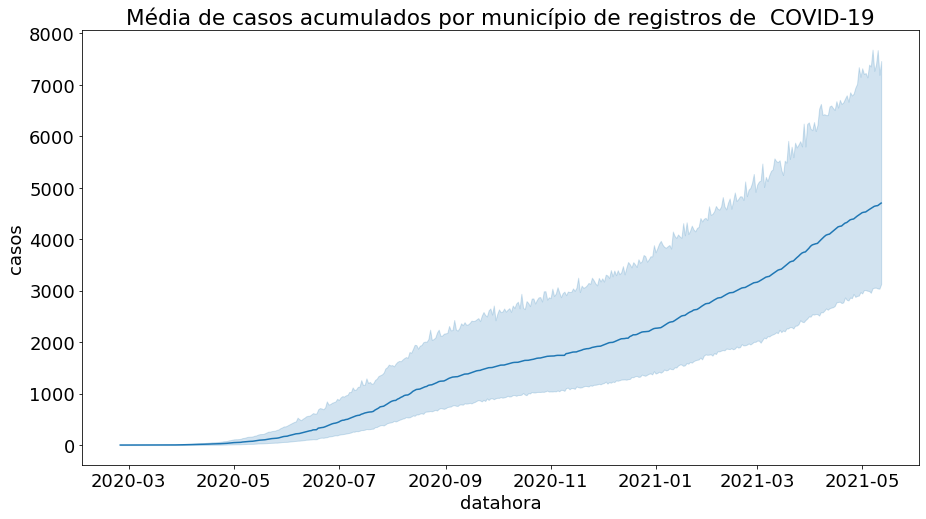

In [4]:
# Plot dos casos em função do tempo
sns.lineplot(data=dados, x='datahora', y='casos')
plt.title('Média de casos acumulados por município de registros de  COVID-19')
plt.show()

Gráfico 1: Média de casos acumulados por município de registros de  COVID-19.<br>
1. O gráfico mostra uma linha azul escura, que se trata da média de casos registrados de COVID-19 de todos os municípios do Brasil.
2. O grafico mostra em azul claro, uma faixa, ou banda, que representa o intervalo de confiança para a média traçada. Como todos os municípios do brasil estão agrupados, existe uma varuação enorme entre o município de São Paulo, e um município qualquer, isolado, em um distrito rural, logo, a variancia é enorme entre municípios e resulta em uma banda larga de intervalo de confiança.
3. Podemos observar que existe um crescimento **exponencial**, mesmo não sabendo a princípio em qual grau.

<h3><b><span style="color:#5C0040">Exemplo de crescimento exponencial e visualização logistica</span></b></h3>

Crescimento exponencial:
$$e^x$$

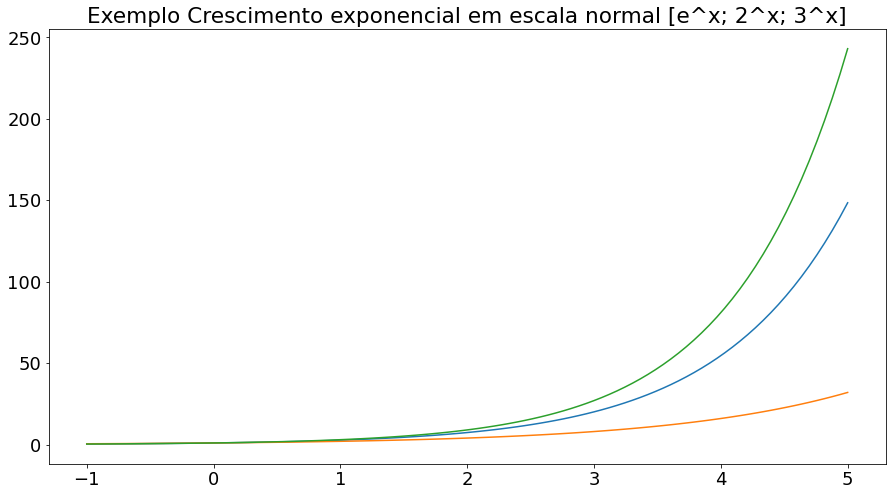

In [5]:
eixo_x = np.linspace(-1, 5, 100)

y_exp_e = np.exp(eixo_x) # Exponencial pelo Número Irracional de Euler (Base o Log Normal)
y_exp_2 = pow(2,eixo_x)
y_exp_3 = pow(3,eixo_x)
y_exp_10 = pow(10,eixo_x)

sns.lineplot(x=eixo_x, y=y_exp_e)
sns.lineplot(x=eixo_x, y=y_exp_2)
sns.lineplot(x=eixo_x, y=y_exp_3)
#sns.lineplot(x=eixo_x, y=y_exp_10)
plt.title('Exemplo Crescimento exponencial em escala normal [e^x; 2^x; 3^x]')
plt.show()

Grafico 2: Exemplo Crescimento exponencial em escala normal.<br>
O crescimento exponencial vai ganhando muita proporção a medida que o tempo passa, e é denotado pelo crescimento inicial "suave" e logo ganha proporção, formando uma curva num gráfico 2D

$$ log_2 2 = 1$$

$$ log_2 2^x = x $$

$$ log_e e^x = x $$

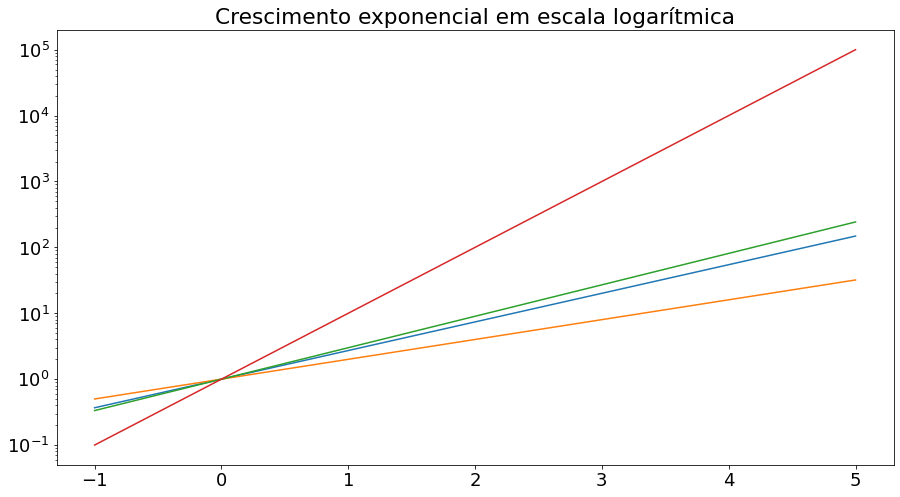

In [6]:
ax=sns.lineplot(x=eixo_x, y=y_exp_e)
ax=sns.lineplot(x=eixo_x, y=y_exp_2)
ax=sns.lineplot(x=eixo_x, y=y_exp_3)
ax=sns.lineplot(x=eixo_x, y=y_exp_10)
plt.title('Crescimento exponencial em escala logarítmica')
mpl.pyplot.yscale('log')
plt.show()


Gráfico 3: Crescimento exponencial em escala logarítmica.<br>
Em uma escala **logarítmica**, funções de crescimento exponencial são exibidas como retas ao invés de curvas, onde a inclinação da reta com o eixo das abscissas (x) vai dizer o grau da exponenciação da curva, quanto maior (10^x - curva vermelha) maior o angulo.

<h3><b><span style="color:#5C0040">Selecionando município de São Paulo</span></b></h3>

In [7]:
dados_sp = dados.query('nome_munic == "São Paulo"').copy()

<h3><b><span style="color:#5C0040">Visualização incial do município de são paulo</span></b></h3>

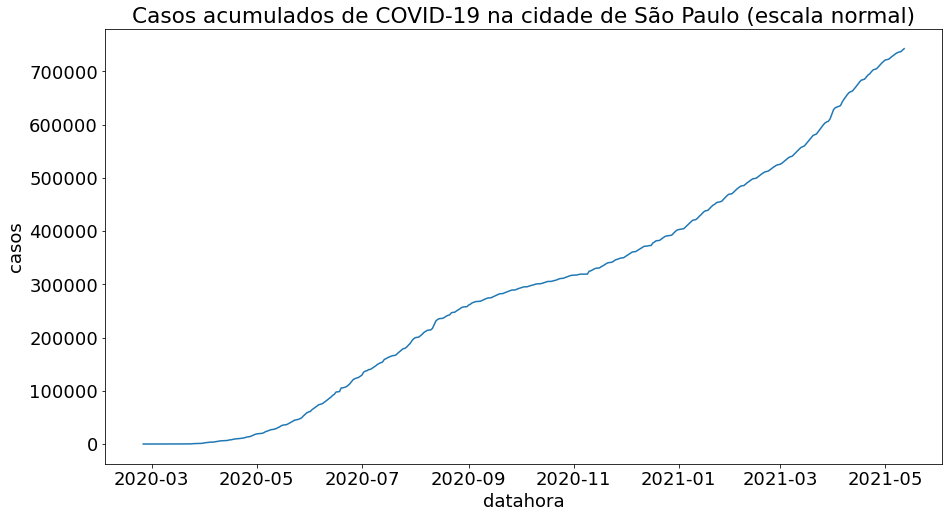

In [8]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.title('Casos acumulados de COVID-19 na cidade de São Paulo (escala normal)')
plt.show()

Gráfico 4: Casos acumulados de COVID-19 na cidade de São Paulo (escala normal).<br>
1. Podemos observar que o crescimento não é linear.
2. Parece ser um crescimento exponencial, que muda de base ao longo do tempo.

Para confirmar, vamos plotar o mesmo gráfico, com uma escala logistica.

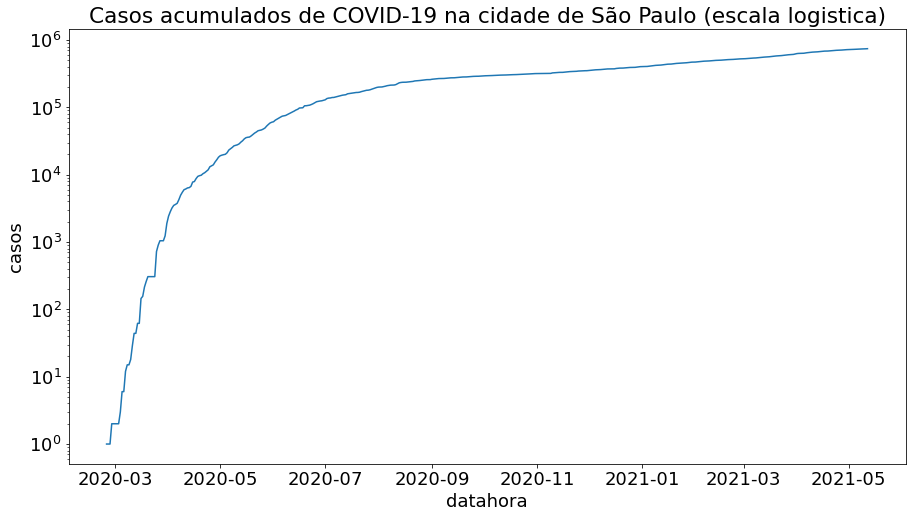

In [9]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.title('Casos acumulados de COVID-19 na cidade de São Paulo (escala logistica)')
mpl.pyplot.yscale('log')
plt.show()

<img src="./img/casos_acumulados_cov19_log_scale.png">
Podemos ver que realmente existiu um crescimento exponencial

<a id='taxa_de_crescimento_e_media_movel'></a>
<h2><b><span style="color:#5C0040">Parte 2: </span></b> Taxa de crescimento e média móvel</h2>

>**Observação importante:** A coluna chamada **casos_novos** é a diferenciação da Serie **casos**.<br>
Isso é importante saber antes de entrar na aula, uma vez que essa coluna **casos_novos** vai representar a *velocidade* de movimentação da Série de casos.

<h3><b><span style="color:#5C0040">Análise de Casos novos/ Obitos Novos</span></b></h3>

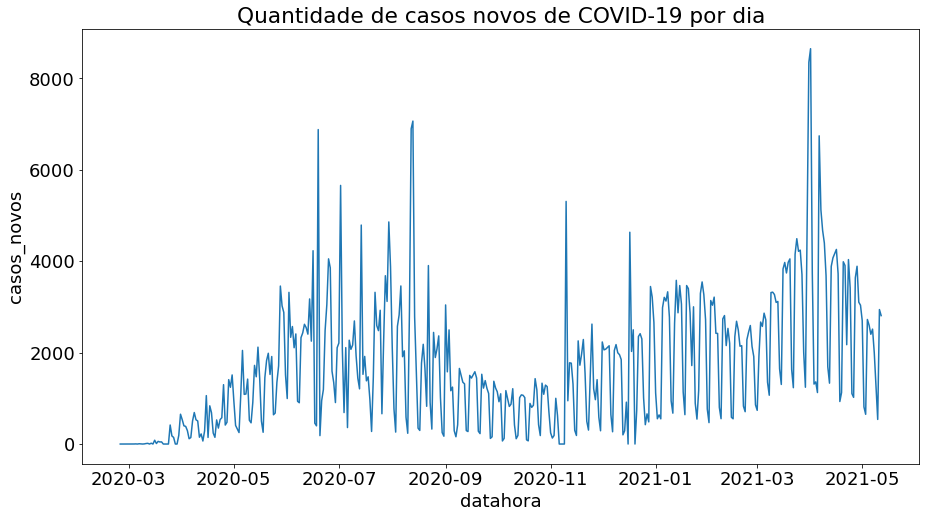

In [12]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
plt.title('Quantidade de casos novos de COVID-19 por dia')
plt.show()

Gráfico 6:Quantidade de casos novos de COVID-19 por dia.<br>
Parece que existe uma certa periodicidade semanal, mais precisamos investigar. Além disso, ao longo do tempo a amplitude parece aumentar e diminuir (será que são as duas grande ondas que acometeram a cidade? precisamos investigar)

Uma maneira de avaliar essa informação é por meio da diferenciação dessa reta.<br>
Quando se faz isso (diferenciação do número de casos diários), nós temos duas perspectivas:
1. É a diferenciação de segunda ordem da série de casos, oiu seja, é a aceleração em que os casos variam.
2. É a diferenciação de primeira ordem da série de casos_novos, ou seja, é a velocidade em que os casos novos variam.
3. A mesma analogia de 1 e 2 se aplicam em obitos e obitos_novos

<h3><b><span style="color:#5C0040">Taxa de variação de casos novos/ Obitos novos</span></b></h3>

In [13]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

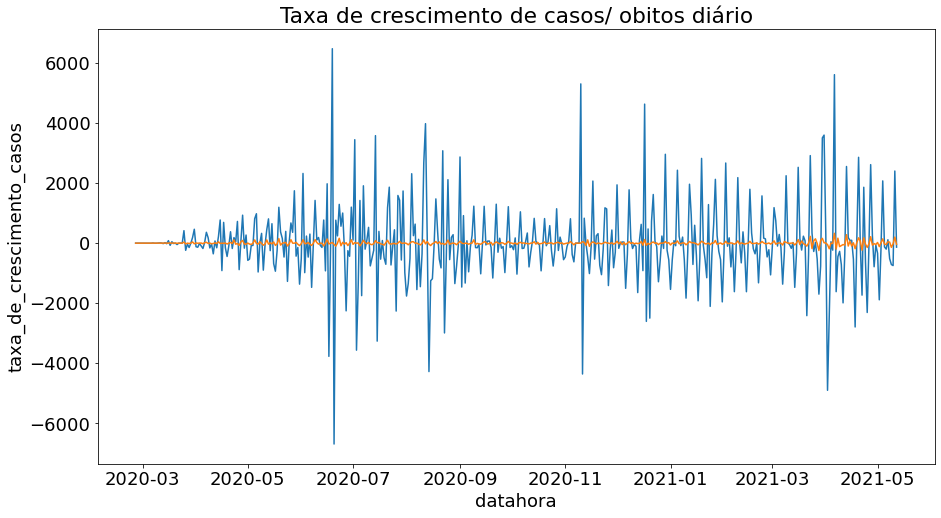

In [14]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)
plt.title('Taxa de crescimento de casos/ obitos diário')
plt.show()

A escala é diferente entre as duas séries. Será que os picos coincidem?<br>
Para responder essa pergunta, vou plotar as duas séries em eixos y diferentes, a esquerda e direita do gráfico.

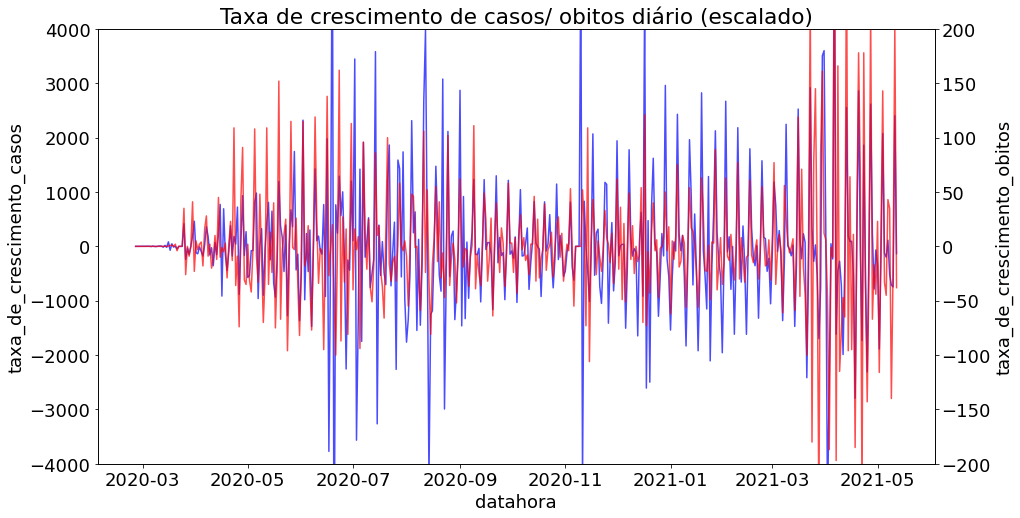

In [37]:
ax1 = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, alpha=0.7, color='blue')
ax1.set(ylim=(-4000, 4000))

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, alpha=0.7, color='red')
ax2.set(ylim=(-200, 200))

plt.title('Taxa de crescimento de casos/ obitos diário (escalado)')
plt.show()

Grafico 8: Taxa de crescimento de casos/ obitos diário (escalado).<br>
A resposta é **sim**, visualmente é possível identificar que os picos de obitos e de casos informados coincidem na sua maioria

<h3><b><span style="color:#5C0040">Análise de Casos novos de 2021 por barras (visualização padrão)</span></b></h3>

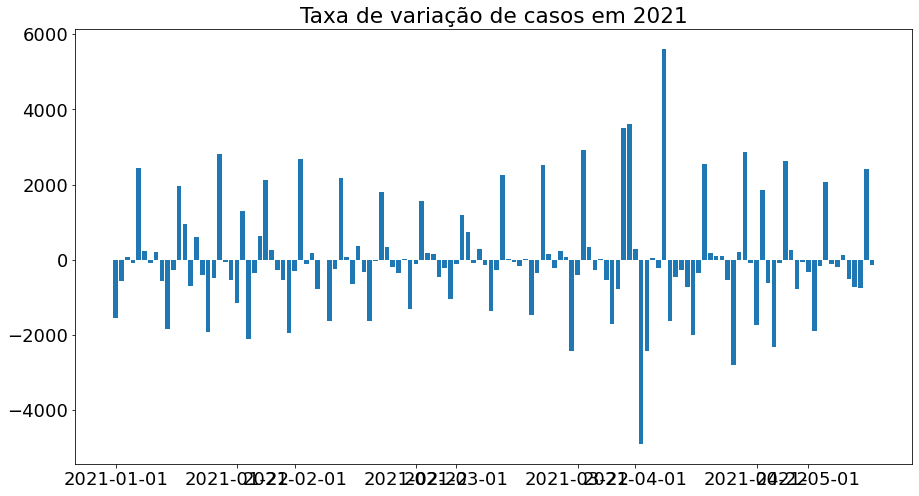

In [39]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_2021 = dados_sp.query('ano==2021')
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])
plt.title('Taxa de variação de casos em 2021')
plt.show()

Gráfico 9: Taxa de variação de casos em 2021.<br>
Mesma informação dos gráficos anteriores, só que em barras em vez de linhas. Essa é a visualização padrão desse gráfico.

<h3><b><span style="color:#5C0040">Análise de Tendência com Média Móvel</span></b></h3>

In [42]:
# O parametro center = True vai fazer o valor (label) da rolling window aparecer no meio do período
# O mesmo parametro center = False faz o valor aparecer no fim do período.
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

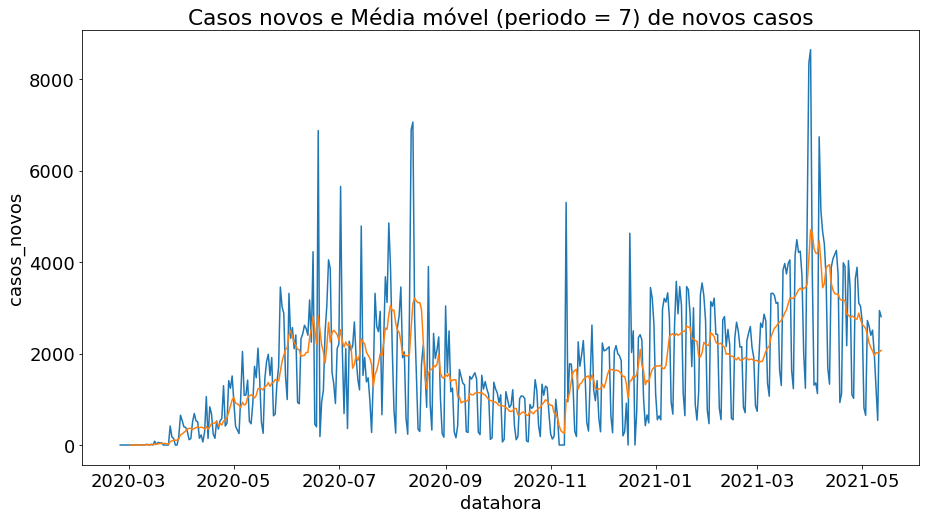

In [50]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)
plt.title('Casos novos e Média móvel (periodo = 7) de novos casos')
plt.show()

Gráfico 10: Casos novos e Média móvel (periodo = 7) de novos casos.<br>
curva suavizada do número de casos novos por dia. Serve para ver uma tendência e suavizar a variação da possível sazonalidade que existe dentro da semana.

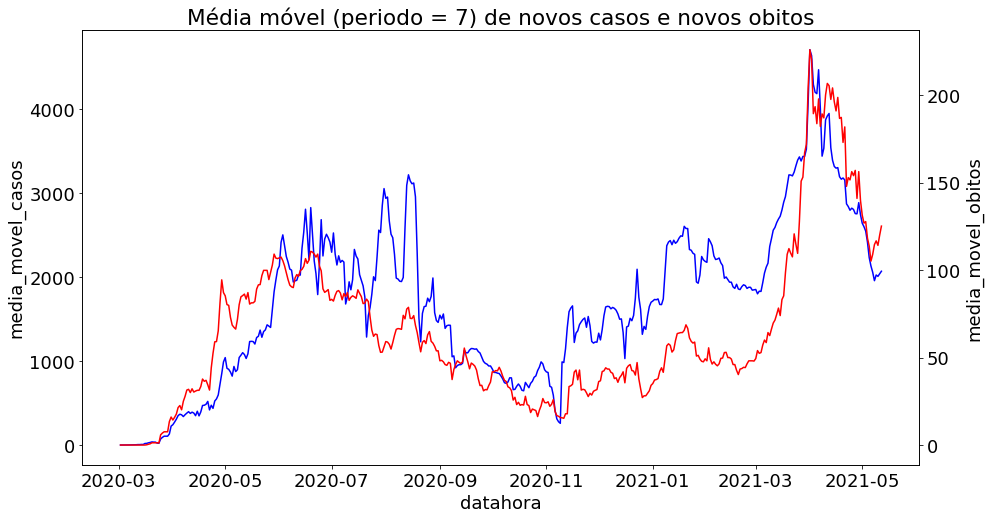

In [51]:
ax1 = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp, color='blue')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp, color='red')
plt.title('Média móvel (periodo = 7) de novos casos e novos obitos')
plt.show()

Gráfico 11: Média móvel (periodo = 7) de novos casos e novos obitos.<br>
Comparaçaõ entre a média móvel de novos casos e novos obitos.

<a id='correlacao_e_funcao_de_autocorrelacao'></a>
<h2><b><span style="color:#5C0040">Parte 3: </span></b>Correlação e função de autocorrelação</h2>

<h3><b><span style="color:#5C0040">Análise de correlação</span></b></h3>

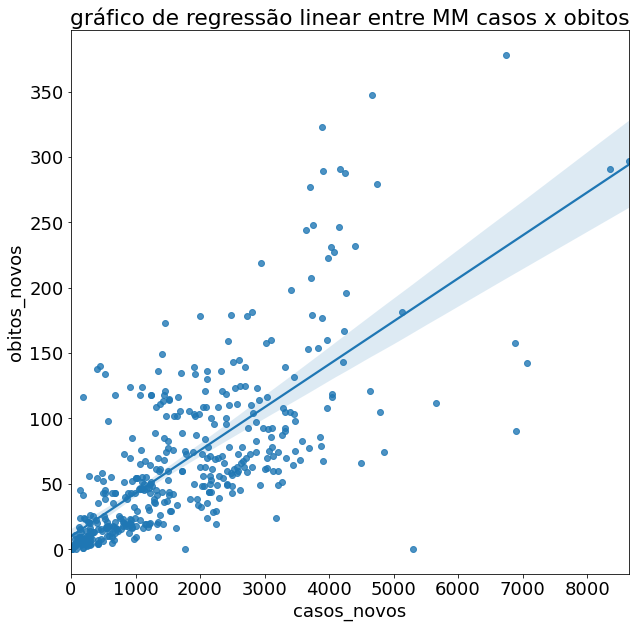

slope:  0.03288
intercept: 9.804601213487793
rvalue: 0.7355323571757683
pvalue: 1.3807170603469149e-76
stderr: 0.0014423341312766642
intercept_stderr: 3.173719575440819



In [75]:
plt.figure(figsize=(10,10))
sns.regplot(x='casos_novos', y='obitos_novos', data=dados_sp)
plt.title('gráfico de regressão linear entre MM casos x obitos')
plt.show()
result = linregress(dados_sp['casos_novos'], dados_sp['obitos_novos'])
print(f'slope: {result.slope: .5f}\nintercept: {result.intercept: .5f}\nrvalue: {result.rvalue: .5f}\npvalue: {result.pvalue: .5f}\nstderr: {result.stderr: .5f}\nintercept_stderr: {result.intercept_stderr: .5f}\n')

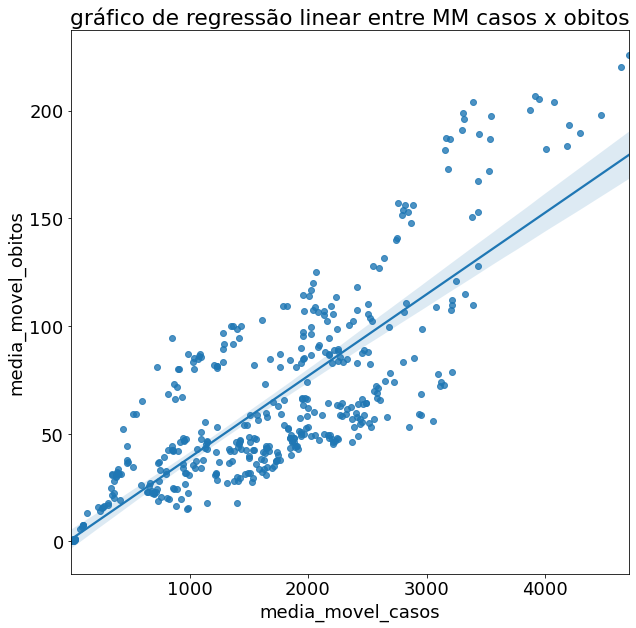

slope:  0.03793
intercept:  0.98240
rvalue:  0.80585
pvalue:  0.00000
stderr:  0.00134
intercept_stderr:  2.59355



In [76]:
plt.figure(figsize=(10,10))
sns.regplot(x='media_movel_casos', y='media_movel_obitos', data=dados_sp)
plt.title('gráfico de regressão linear entre MM casos x obitos')
plt.show()
result = linregress(dados_sp['media_movel_casos'].dropna(), dados_sp['media_movel_obitos'].dropna())
print(f'slope: {result.slope: .5f}\nintercept: {result.intercept: .5f}\nrvalue: {result.rvalue: .5f}\npvalue: {result.pvalue: .5f}\nstderr: {result.stderr: .5f}\nintercept_stderr: {result.intercept_stderr: .5f}\n')

Existe uma dependência linear entre as duas variáveis? a resposta é **sim**, aparentemente existe.<br>
Poderíamos tentar investigar nesse caso se com um alto numero de casos, também teríamos um alto número de internações (tudo faz crer que sim) e com um alto numero de internações os hospitais trabalhariam em sua capacidade máxima e então o número de obitos aumentaria repentinamente. Esse tipo de comportamento poderia justificar a subida repentina dos obitos a partir dos 3000 casos diários. Esses dados não estão no tempo, então pode ser que não seja somente isso, mais é um caminho para uma investigação.

<h3><b><span style="color:#5C0040">Sazonalidade</span></b></h3>

In [87]:
# Cria coluna de mês
dados_sp['mes'] = pd.DatetimeIndex(dados_sp['datahora']).month

dados_202101 = dados_sp.query('mes == 1 & ano==2021')
dados_202102 = dados_sp.query('mes == 2 & ano==2021')

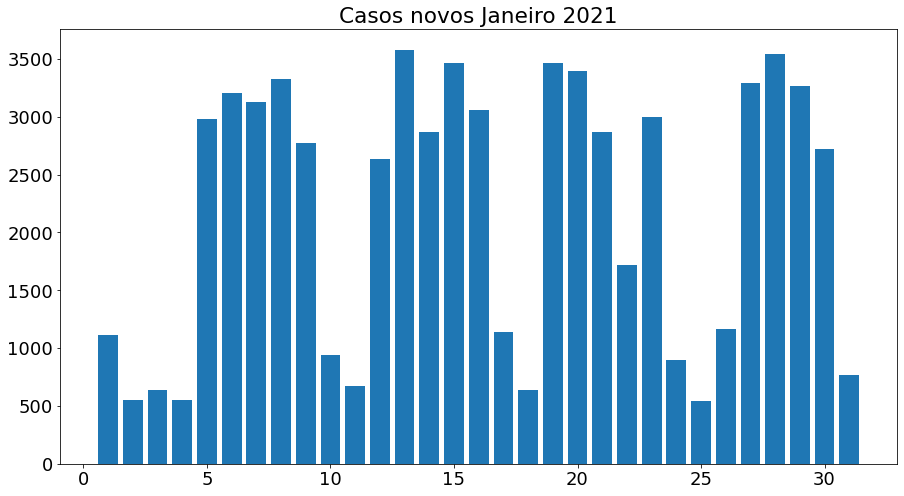

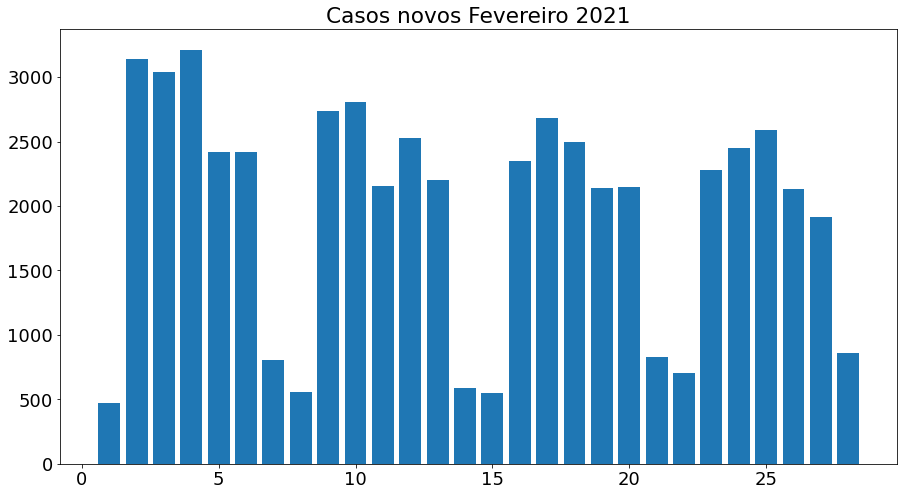

In [88]:
plt.bar(np.linspace(1, len(dados_202101), len(dados_202101)), dados_202101['casos_novos'])
plt.title('Casos novos Janeiro 2021')
plt.show()
plt.bar(np.linspace(1, len(dados_202102), len(dados_202102)), dados_202102['casos_novos'])
plt.title('Casos novos Fevereiro 2021')
plt.show()

Tanto em Janeiro quanto em Fevereiro nós consiguimos observar que a cada 7 dias, temos 5 dias com notificação de casos alta e 2 dias com notificação de casos baixo.
Dia 1-4 Janeiro: Inicio do ano tudo fechado
Dia 25 Janeiro: Aniversário de São Paulo.

Tudo leva a crer que existe uma sazonalidade semanal, e um evento exporádico (feriados) que também causa a diimunuição da notificação.

<h3><b><span style="color:#5C0040">Autocorrelação</span></b></h3>

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

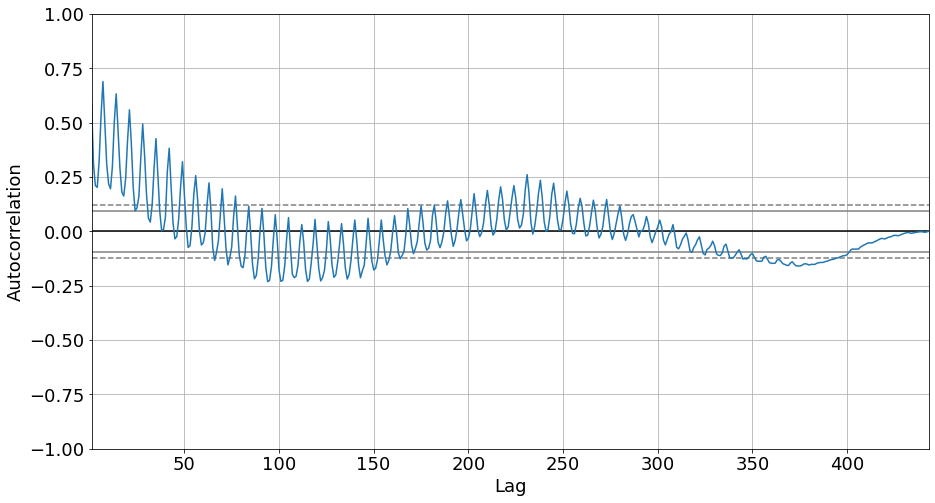

In [89]:
autocorrelation_plot(dados_sp['casos_novos'])

A autocorrelação é uma série de correlação da variável com ela mesma, com os valores de x defasados (lags) amostra por amostra.<br>
Nesse tipo de gráfico, a forma é mais importante que o valor (de modo geral). Podemos observar um cíclo acontecendo em uma frequência mais alta (a cada 7 dias), o que denota uma sazonalidade semanal.
Vamos dar um zoom no lag 0-50 para ver isso na prática

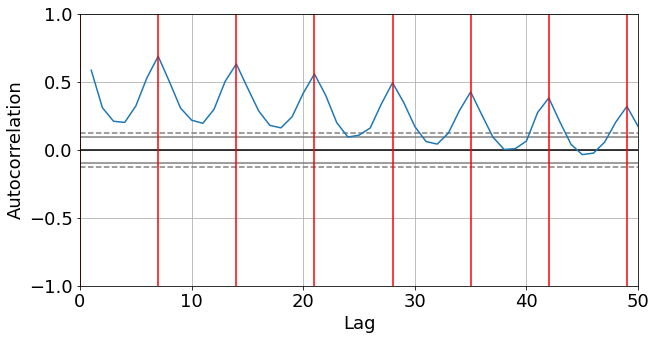

array([ 0.,  7., 14., 21., 28., 35., 42., 49.])

In [99]:
sete_em_sete_dias = np.linspace(0, 49, 8)

plt.figure(figsize=(10,5))
autocorrelation_plot(dados_sp['casos_novos'])
for i in sete_em_sete_dias:
    plt.axvline(x = i, color = 'r', linestyle = '-')
plt.xlim(0,50)
plt.show()
sete_em_sete_dias

Isso mostra que existe um período bem definido de eventos que se repetem a cada 7 dias.

<h3><b><span style="color:#5C0040">Autocorrelação: estudo para obternção da sazonalidade automática<br>Teste com contagem e diferenciação dos picos</span></b></h3>

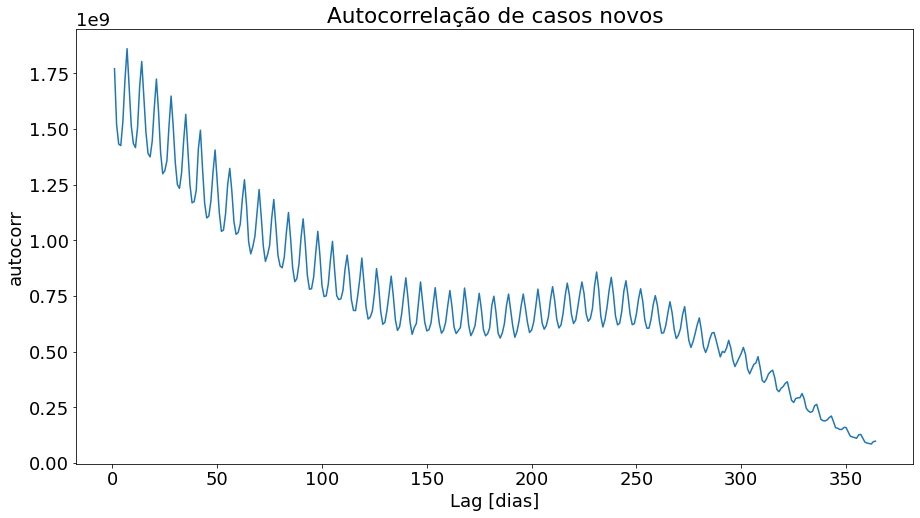

In [142]:
# Passo 1, criando a série de autocorrelação:


autocorr  = np.correlate(dados_sp['casos_novos'], dados_sp['casos_novos'], mode='full')
autocorr = autocorr[len(autocorr)//2:]
autocorr = pd.DataFrame({'autocorr':autocorr[1:365]})
autocorr['x_autocorr'] = np.linspace(1, 364, 364)
# Tirei o primeiro ponto porque acredito que ele é um ponto muito alto e vai me atrapalhar
# Tirei o final pq o objetivo é detectar a variação e o sinal já estava sem força (deveria ter tirado ainda mais)

sns.lineplot(x='x_autocorr', y='autocorr', data=autocorr)
plt.title('Autocorrelação de casos novos')
plt.xlabel('Lag [dias]')
plt.show()



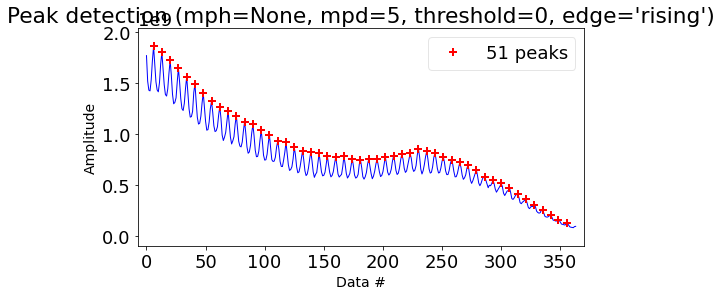

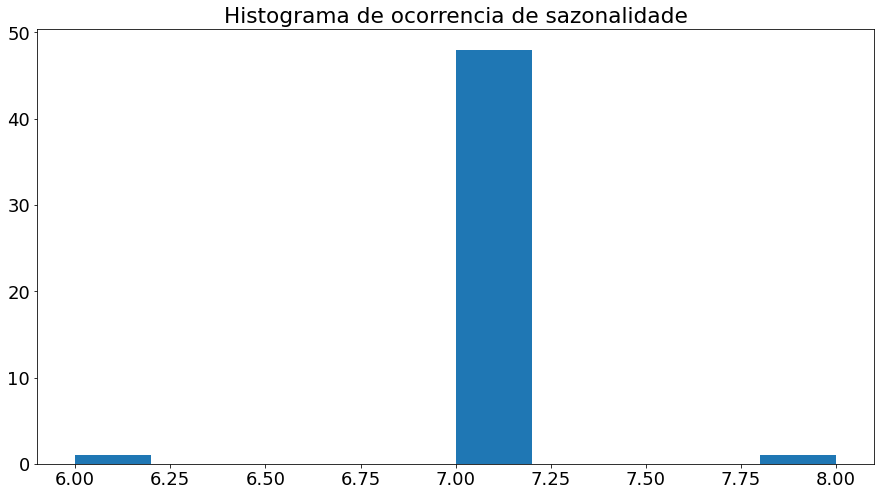

Value counts do período


7.0    48
6.0     1
8.0     1
dtype: int64

In [148]:
peaks = detect_peaks(autocorr['autocorr'], edge='rising', valley=False, mpd=5, show=True)
plt.hist(pd.DataFrame(x_autocorr[peaks]).astype(int).diff())
plt.title('Histograma de ocorrencia de sazonalidade')
plt.show()
print('Value counts do período')
pd.DataFrame(x_autocorr[peaks]).astype(int).diff().value_counts()
#pd.DataFrame(x_autocorr[peaks]).astype(int).diff()

Vemos que existe uma sazonalidade semanal, que conseguiu ser evidenciada por uma contagem básica do período.

<h3><b><span style="color:#5C0040">Autocorrelação: estudo para obternção da sazonalidade automática<br>Simulação para prova de conceito análise no dominio da frequência</span></b></h3>

In [149]:
# Antes de mais nada, vou tentar elaborar um sistema teórico para validar o conceito.
# Requisitos:
# Plotar uma senóide com T = 7 dias
# Replicar a senoide por 365 dias

# Resultado esperado:
# Se eu tenho uma frequência de aquisição de 365 Hz (365 dias em um ano)
# E um evento que acontece a cada 7 dias, então eu espero uma freuquencia de: 52Hz
# que significa: 52 eventos por ano, ou 1 evento a cada 7 dias.

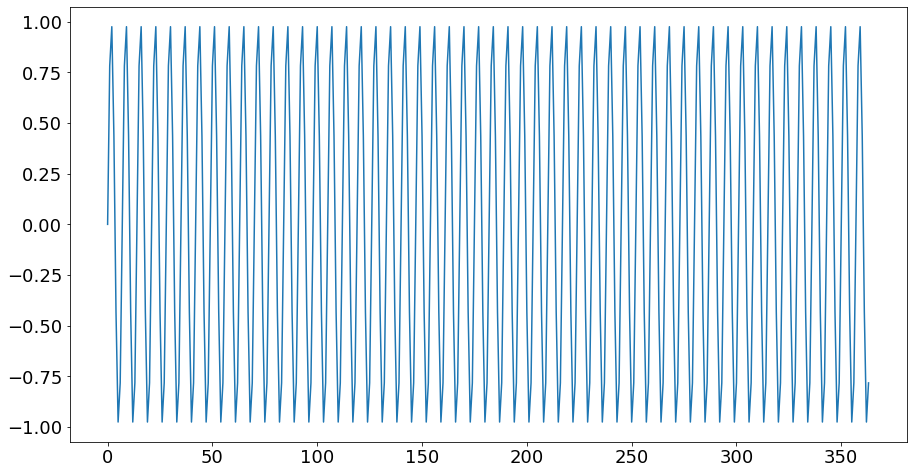

In [172]:
# Criação do sinal teórico
ano = np.linspace(0, 363, 364)
ciclos = (ano % 7)
angulo = (360/7) * ciclos
sinal = np.sin(angulo * np.pi / 180)
plt.plot(sinal)

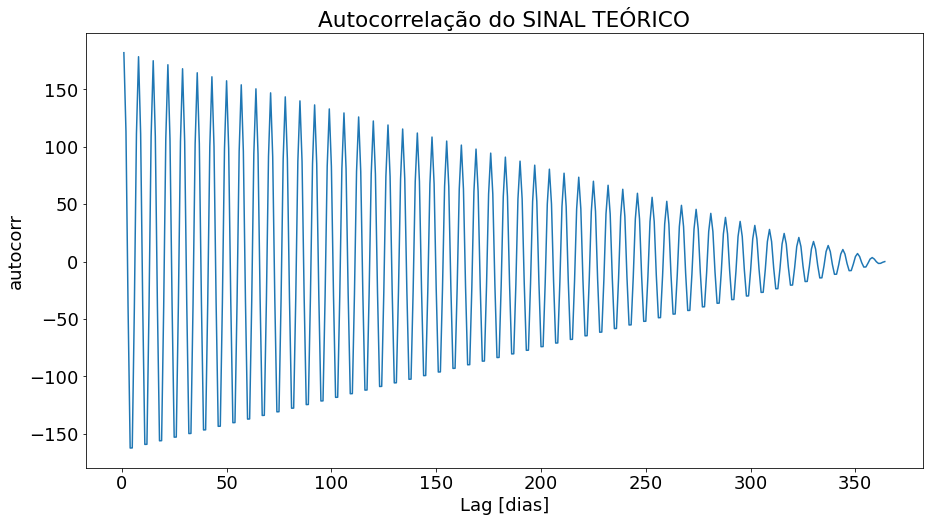

In [216]:
# Autocorrelação do sinal teórico
#autocorrelation_plot(sinal)
autocorr_st  = np.correlate(sinal, sinal, mode='full')
autocorr_st = autocorr_st[len(autocorr_st)//2:]
autocorr_st = pd.DataFrame({'autocorr':autocorr_st})
autocorr_st['x_autocorr'] = np.linspace(1, len(autocorr_st['autocorr']), len(autocorr_st['autocorr'])) #desnecessário para esse caso, mais vai q vai
sns.lineplot(x='x_autocorr', y='autocorr', data=autocorr_st)
plt.title('Autocorrelação do SINAL TEÓRICO')
plt.xlabel('Lag [dias]')
plt.show()

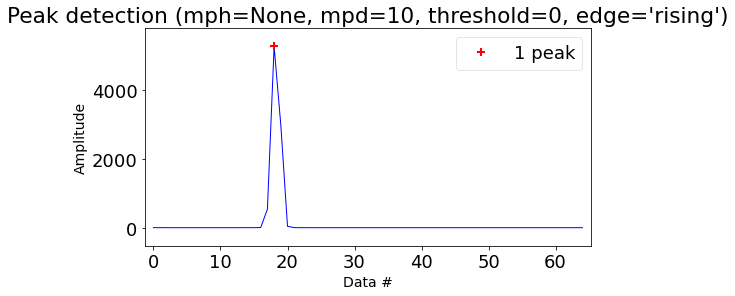

Frequência:  51.33 Hz


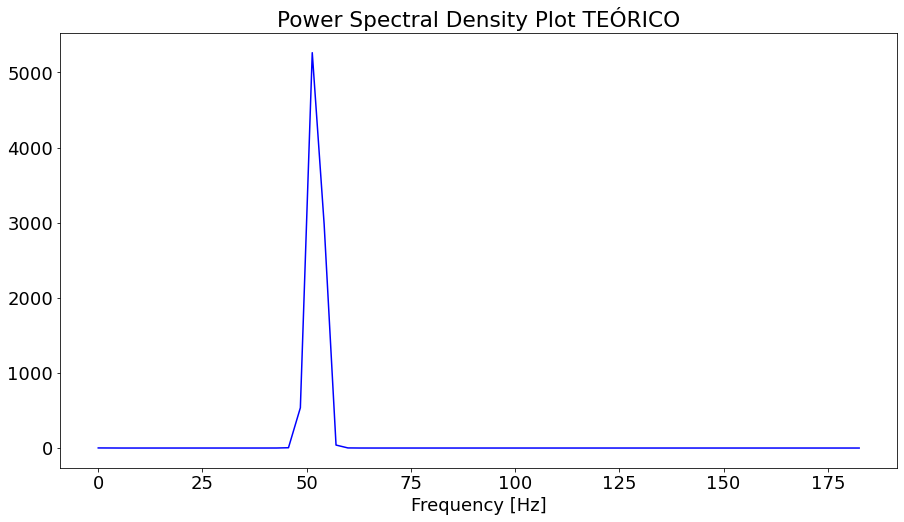

In [253]:
fs = 365
f_val, psd_val = welch(autocorr_st['autocorr'], fs=fs, window='hann', nperseg=128, scaling = 'spectrum', noverlap=64)
peaks = detect_peaks(psd_val, edge='rising', valley=False, mpd=10, show=True)
frequencia = f_val[peaks][0]
print(f'Frequência: {frequencia: .2f} Hz')
plt.plot(f_val, psd_val, linestyle='-', color='blue')
plt.title('Power Spectral Density Plot TEÓRICO')
plt.xlabel('Frequency [Hz]')
plt.show()

**SE EU TENHO UM EVENTO QUE ACONTECE 51,33x POR ANO, EU POSSO ASSUMIR QUE:**<br><br>
$$\frac{365} {51.33} = 7.11$$<br>
**MEU EVENTO ACONTECE A CADA 7 DIAS, OU SEJA, UMA SEMANA.**<br><br>
**RESULTADO DO TESTE DE CONCEITO = APROVADO**

<h3><b><span style="color:#5C0040">Autocorrelação: estudo para obternção da sazonalidade automática<br>Simulação para prova de conceito análise no dominio da frequência</span></b></h3>

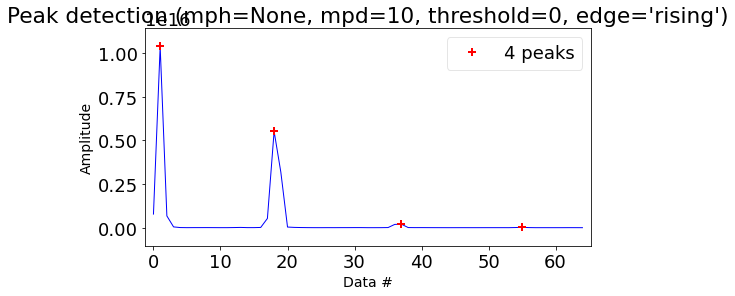

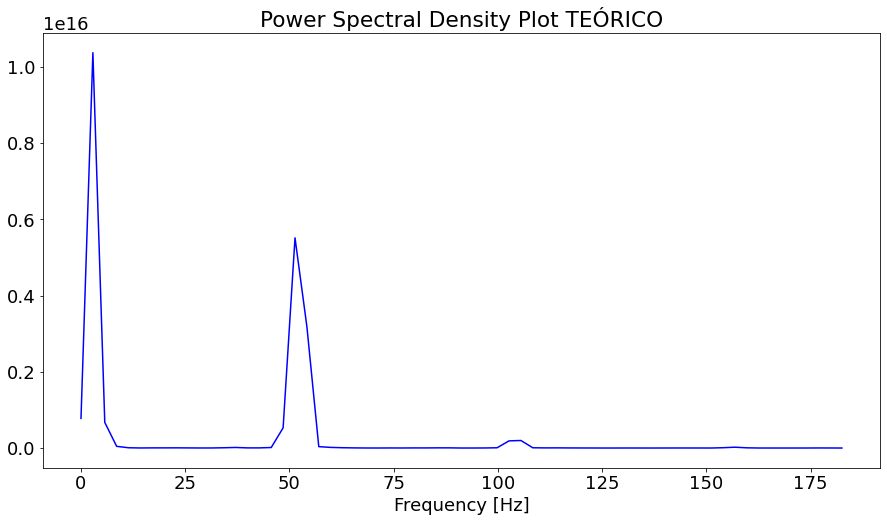

In [268]:
fs = 365
f_val, psd_val = welch(autocorr['autocorr'], fs=fs, window='hann', nperseg=128, scaling = 'spectrum', noverlap=64)
peaks = detect_peaks(psd_val, edge='rising', valley=False, mpd=10, show=True)
frequencia = f_val[peaks]
#print(f'Frequência: {frequencia: .2f} Hz')
plt.plot(f_val, psd_val, linestyle='-', color='blue')
plt.title('Power Spectral Density Plot TEÓRICO')
plt.xlabel('Frequency [Hz]')
plt.show()

Na medida que a frequência almenta a energia diminui, por isso, se faz necessário a visualização em DB. Vou plotar novamente para efeito de entendimento, mais isso não muda a posição dos pontos.

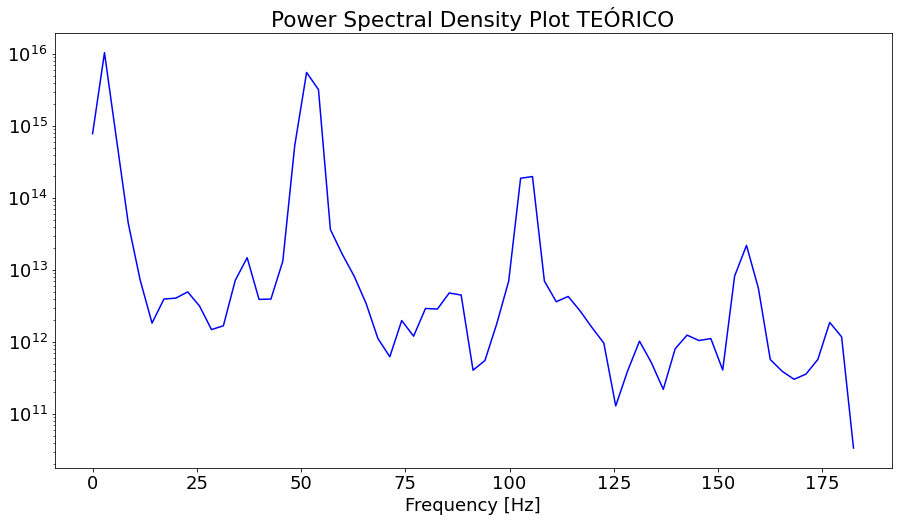

In [269]:
plt.plot(f_val, psd_val, linestyle='-', color='blue')
plt.title('Power Spectral Density Plot TEÓRICO')
plt.xlabel('Frequency [Hz]')
mpl.pyplot.yscale('log')
plt.show()

**TEMOS AQUI 4 EVENTOS, POTENCIALMENTE PERIÓDICOS, QUE SÃO:**<br>

```
2,85Hz     128dias
51,32Hz    7dias
105,50Hz   3 dias
156,83Hz   2 dias
```


In [272]:
display(frequencia)
display(365/frequencia)

array([  2.8515625,  51.328125 , 105.5078125, 156.8359375])

array([128.        ,   7.11111111,   3.45945946,   2.32727273])

O método deu certo. Podemos ver que existe uma grande senoide no gráfico de autocorrelação. Vemos também 7 dias bem definido e o período de 3 e 2 dias ainda precisa ser investigado.

Aparentemente esse poderia ser um bom ponto de partida ou então uma reafirmação de alguma suspeita de periodicidade em um gráfico que não fique tão claro os períodos.

___________________________________________________
| [Home](#home) | [Aula 02](Aula_02.ipynb) |